Imports:

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce
from sklearn.metrics import mean_absolute_error,mean_squared_error

Open, print and plot data:

In [2]:
df = pd.read_csv("vehicles.csv")

In [3]:
df

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,...,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,...,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,...,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,...,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600


In [4]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,426880.0,7.311487e+09,4.473170e+06,7.207408e+09,7.308143e+09,7.312621e+09,7.315254e+09,7.317101e+09
price,426880.0,7.519903e+04,1.218228e+07,0.000000e+00,5.900000e+03,1.395000e+04,2.648575e+04,3.736929e+09
year,425675.0,2.011235e+03,9.452120e+00,1.900000e+03,2.008000e+03,2.013000e+03,2.017000e+03,2.022000e+03
odometer,422480.0,9.804333e+04,2.138815e+05,0.000000e+00,3.770400e+04,8.554800e+04,1.335425e+05,1.000000e+07
county,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lat,420331.0,3.849394e+01,5.841533e+00,-8.412225e+01,3.460190e+01,3.915010e+01,4.239890e+01,8.239082e+01
long,420331.0,-9.474860e+01,1.836546e+01,-1.598277e+02,-1.119398e+02,-8.843260e+01,-8.083204e+01,1.738855e+02


In [6]:
df.value_counts("type")

type
sedan          87056
SUV            77284
pickup         43510
truck          35279
other          22110
coupe          19204
hatchback      16598
wagon          10751
van             8548
convertible     7731
mini-van        4825
offroad          609
bus              517
Name: count, dtype: int64

<Axes: xlabel='year', ylabel='price'>

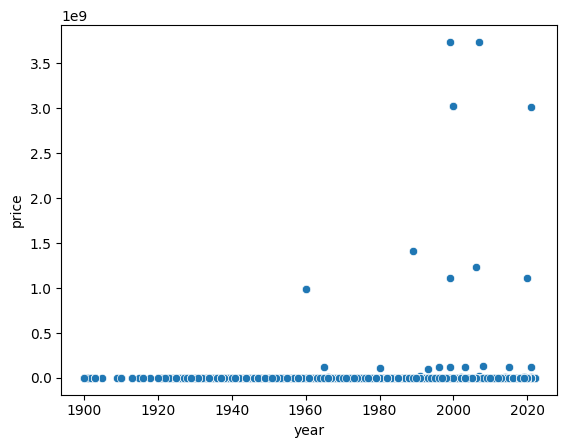

In [20]:
sns.scatterplot(df, x="year", y="price") # important

<Axes: xlabel='type', ylabel='price'>

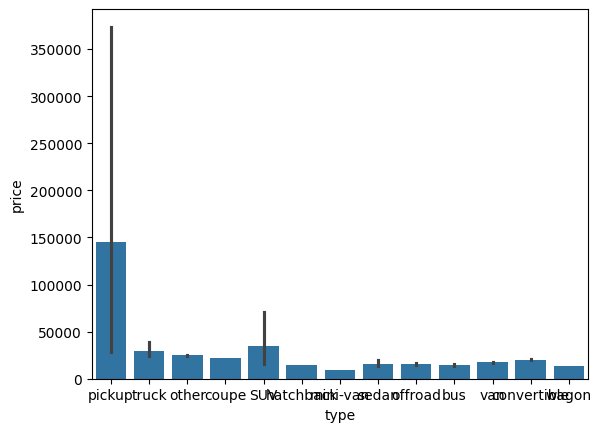

In [8]:
sns.barplot(df, x="type", y="price") # doesn't look important

<Axes: xlabel='condition', ylabel='price'>

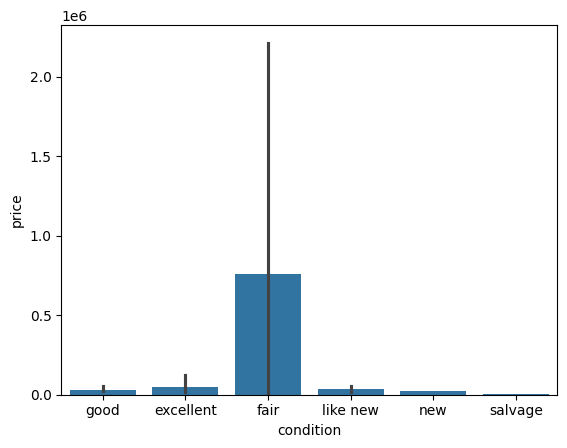

In [9]:
sns.barplot(df, x="condition", y="price")

<Axes: xlabel='size', ylabel='price'>

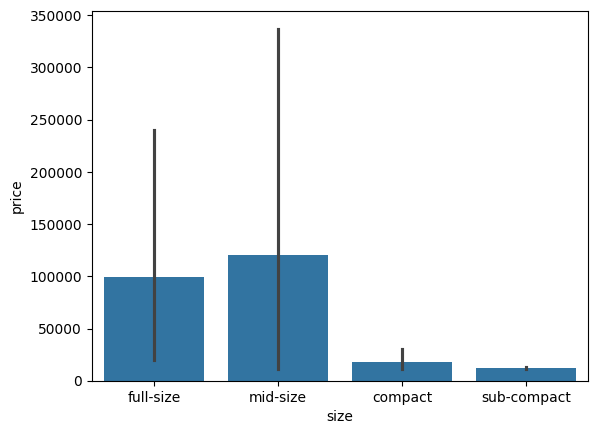

In [10]:
sns.barplot(df, x="size", y="price") # important

In [11]:
df.value_counts("size")

size
full-size      63465
mid-size       34476
compact        19384
sub-compact     3194
Name: count, dtype: int64

<Axes: xlabel='paint_color', ylabel='price'>

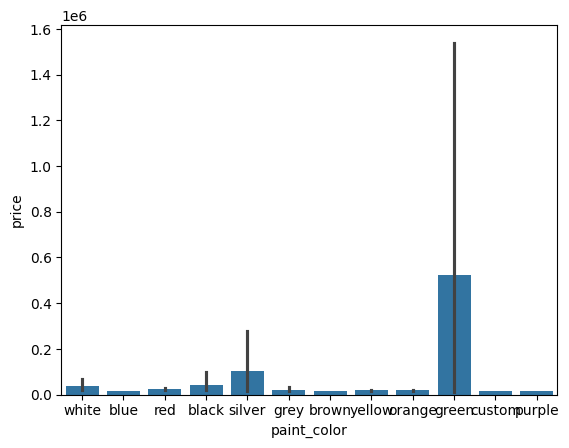

In [12]:
sns.barplot(df, x="paint_color", y="price") 

In [13]:
df.value_counts("region") # we will ignore they are to sparsed 

region
columbus                   3608
jacksonville               3562
spokane / coeur d'alene    2988
eugene                     2985
fresno / madera            2983
                           ... 
meridian                     28
southwest MS                 14
kansas city                  11
fort smith, AR                9
west virginia (old)           8
Name: count, Length: 404, dtype: int64

In [14]:
df.value_counts("drive")

drive
4wd    131904
fwd    105517
rwd     58892
Name: count, dtype: int64

<Axes: xlabel='drive', ylabel='price'>

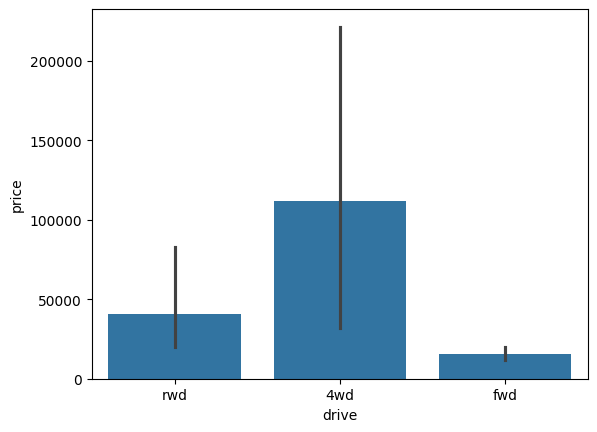

In [15]:
sns.barplot(df, x="drive", y="price")

In [16]:
df.shape[0]

426880

In [18]:
df.isna().mean().sort_values(ascending=False) 

county          1.000000
size            0.717675
cylinders       0.416225
condition       0.407852
VIN             0.377254
drive           0.305863
paint_color     0.305011
type            0.217527
manufacturer    0.041337
title_status    0.019308
lat             0.015342
long            0.015342
model           0.012362
odometer        0.010307
fuel            0.007058
transmission    0.005988
year            0.002823
description     0.000164
image_url       0.000159
posting_date    0.000159
url             0.000000
price           0.000000
state           0.000000
region_url      0.000000
region          0.000000
id              0.000000
dtype: float64

In [19]:
# I am thinking of ignoring coloums below 1% as they would just be noise; we should have started with this
# also ignore county

columns_notna = df.isna().mean().sort_values(ascending=False) 
columns_notna = columns_notna[columns_notna > 0.1].drop("county").index

# will ignore columns with too many unique values

uniques = [df[col].nunique() for col in df.columns]
uniques_columns = pd.Series(index=df.columns, data=uniques).sort_values(ascending=False)
uniques_columns = uniques_columns[uniques_columns < 100].drop("county").index

X_columns = list(set(uniques_columns).intersection(columns_notna)) + ['price']
X_columns

['type', 'cylinders', 'condition', 'size', 'paint_color', 'drive', 'price']

In [328]:
dummy = df[X_columns].dropna(how="any")
print(dummy)
dummy = dummy[X_columns].astype("category")
cat_columns = dummy.drop("price", axis=1).select_dtypes(['category']).columns
print(cat_columns)

dummy[cat_columns] = dummy[cat_columns].apply(lambda x: x.cat.codes)

print(dummy)
# These are the columns we will use for the prediction, we saw there is correlation with the price in the plots

        price
0        6000
1       11900
2       21000
3        1500
4        4900
...       ...
426875  23590
426876  30590
426877  34990
426878  28990
426879  30590

[426880 rows x 1 columns]
Index([], dtype='object')
        price
0        6000
1       11900
2       21000
3        1500
4        4900
...       ...
426875  23590
426876  30590
426877  34990
426878  28990
426879  30590

[426880 rows x 1 columns]


Now, we will create the linear regression, train it and predict.

In [312]:
X_train, X_test, y_train, y_test = train_test_split(dummy[X_columns].drop("price", axis=1), dummy["price"], test_size=0.2)

# encoder_one_hot = OneHotEncoder()
# X_train_one_hot = encoder_one_hot.fit_transform(X_train[X_columns])

model = LinearRegression().fit(X_train, y_train)

# X_test_binary = encoder_one_hot.fit_transform(X_test[X_columns])
predict = model.predict(X_test)

worst = [7.519903e+04] * len(y_test)
print(f"{mean_absolute_error(y_test, predict)=}")
print(f"{mean_squared_error(y_test, predict)=}")
print(f"{np.sqrt(mean_squared_error(y_test, predict))=}")

# Our prediction is not reliable :D
# Maybe I have missed something in what is a reasonable feature to include
# Actually, our error is within 1 standart deviation so that must mean that it is relatively accurate?

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [21]:
df.info()

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [277]:
print(f"{dummy["price"].mean()=}")
df.describe().T

dummy["price"].mean()=5722.00372470015


,count,mean,std,min,25%,50%,75%,max
id,426880.0,7.311487e+09,4.473170e+06,7.207408e+09,7.308143e+09,7.312621e+09,7.315254e+09,7.317101e+09
price,426880.0,7.519903e+04,1.218228e+07,0.000000e+00,5.900000e+03,1.395000e+04,2.648575e+04,3.736929e+09
year,425675.0,2.011235e+03,9.452120e+00,1.900000e+03,2.008000e+03,2.013000e+03,2.017000e+03,2.022000e+03
odometer,422480.0,9.804333e+04,2.138815e+05,0.000000e+00,3.770400e+04,8.554800e+04,1.335425e+05,1.000000e+07
county,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lat,420331.0,3.849394e+01,5.841533e+00,-8.412225e+01,3.460190e+01,3.915010e+01,4.239890e+01,8.239082e+01
long,420331.0,-9.474860e+01,1.836546e+01,-1.598277e+02,-1.119398e+02,-8.843260e+01,-8.083204e+01,1.738855e+02
